In [ ]:
#Importing the necessary packages

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Loading the csv file
df = pd.read_csv('linear regression.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
# Count the null values on each column

df.isnull().sum(axis=0)

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [ ]:
# Total null values 


df.isnull().sum().sum()

52

In [ ]:
# Replace the null values with mean 

for col in df:

    # If data type is object repalce it with mode
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())


In [ ]:
# Initializing label encoder to convert object into int

enc = LabelEncoder()

In [ ]:
# Converting the object data type into int

for col in df:
    if df[col].dtype == 'object':
        print('>>> Column {} -> Unique values >> {}' .format(col, df[col].unique()), end='\t')
        df[col] = enc.fit_transform(df[col])
        print('>>> Column {} -> Unique values >> {}' .format(col, df[col].unique()))


>>> Column sex -> Unique values >> ['male' 'female']	>>> Column sex -> Unique values >> [1 0]
>>> Column smoker -> Unique values >> ['no' 'yes']	>>> Column smoker -> Unique values >> [0 1]
>>> Column region -> Unique values >> ['southeast' 'southwest' 'northwest' 'northeast']	>>> Column region -> Unique values >> [2 3 1 0]


In [ ]:
#Checking for duplicated values

df.duplicated().sum()

0

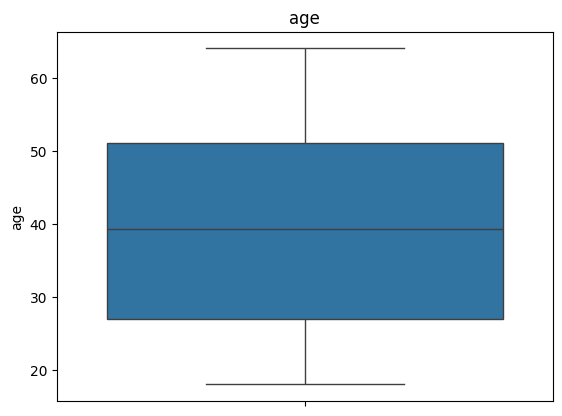

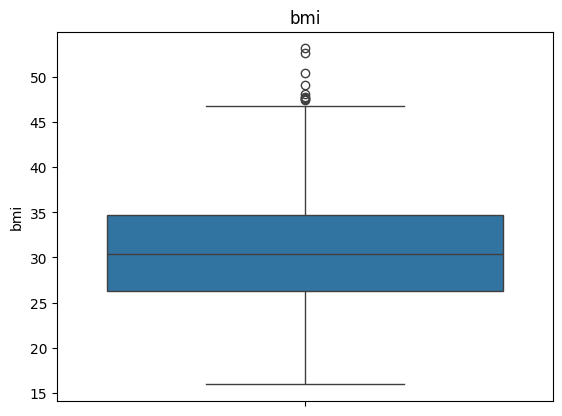

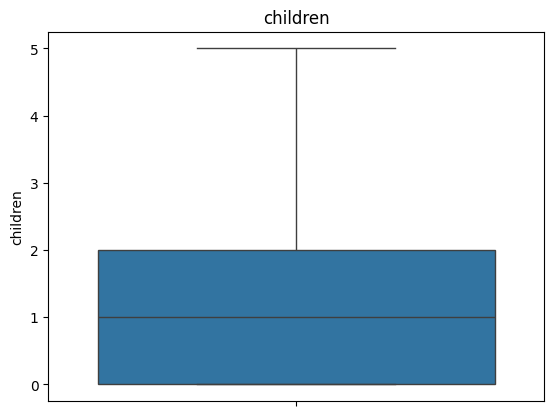

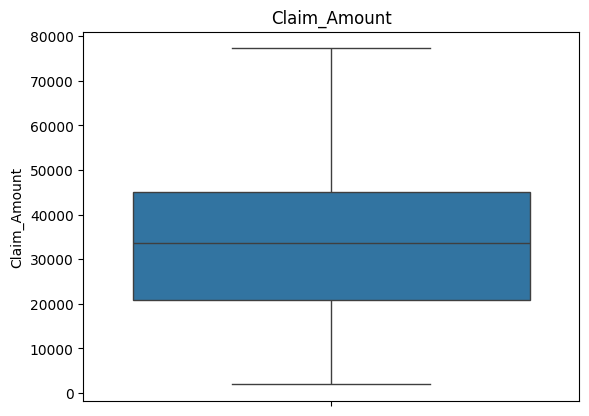

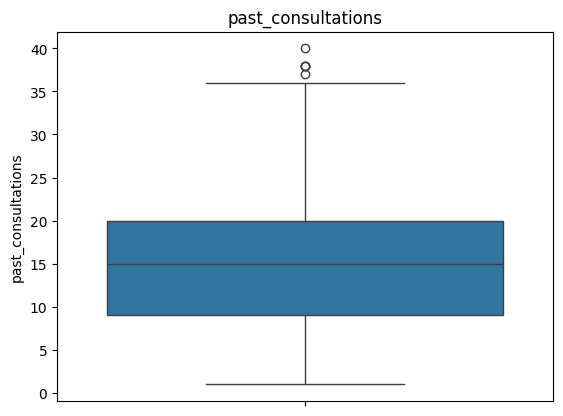

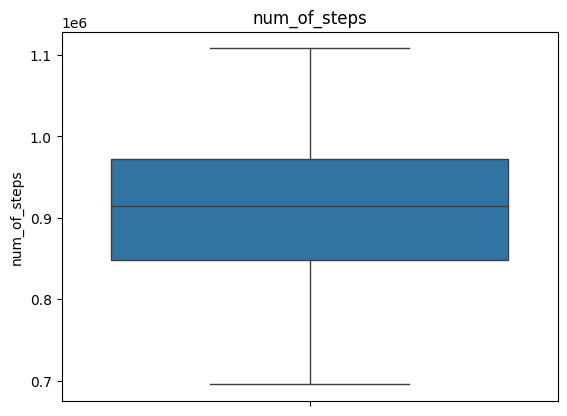

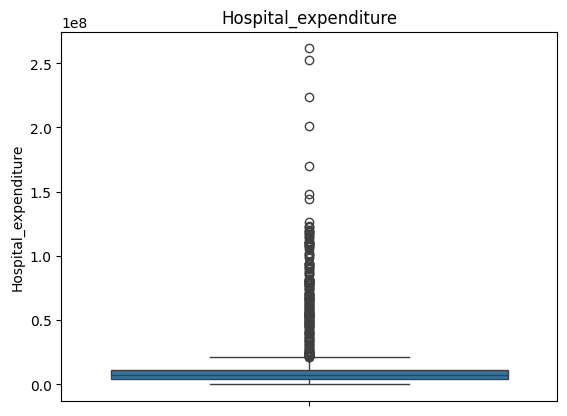

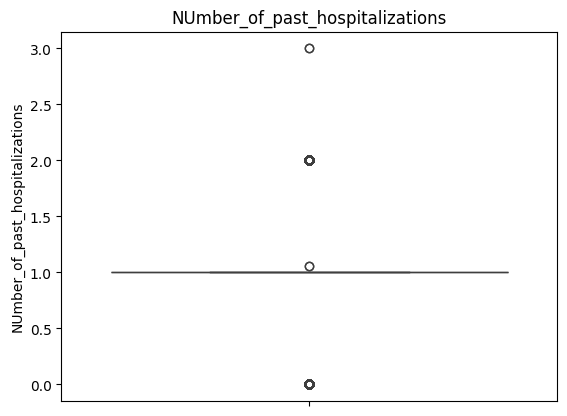

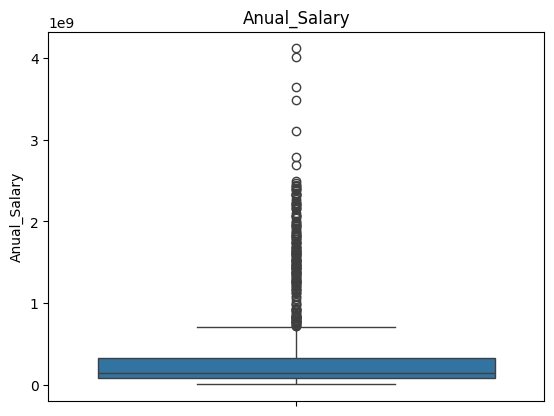

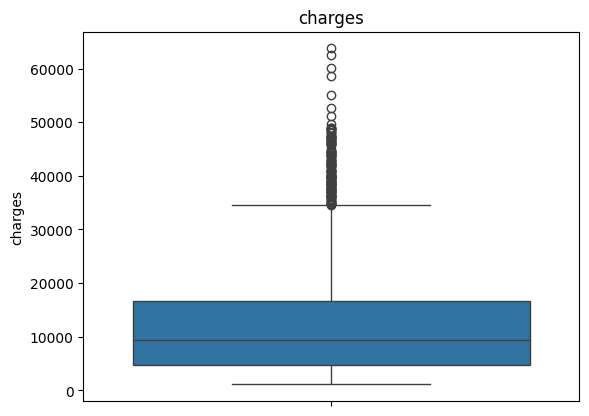

In [ ]:
# ploting boxplot to check outliers

for col in df:
    if df[col].dtype == 'float64':
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

In [ ]:
# Checking outliers on each columns

for col in df:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    IQR = q3-q1

    UB = q3+1.5*(IQR)
    LB = q1-1.5*(IQR)

    print(col, len(df[(df[col]>= LB) & (df[col]<=UB)]))

age 1338
sex 1338
bmi 1329
children 1338
smoker 1064
Claim_Amount 1338
past_consultations 1333
num_of_steps 1338
Hospital_expenditure 1137
NUmber_of_past_hospitalizations 957
Anual_Salary 1146
region 1338
charges 1199


In [ ]:
#Removing the outliers

outliers = ['bmi', 'past_consultations', 'Hospital_expenditure', 'Anual_Salary']
for col in outliers:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    IQR = q3-q1

    UB = q3+1.5*(IQR)
    LB = q1-1.5*(IQR)

    df = df[(df[col]>= LB) & (df[col]<=UB)]

<Axes: >

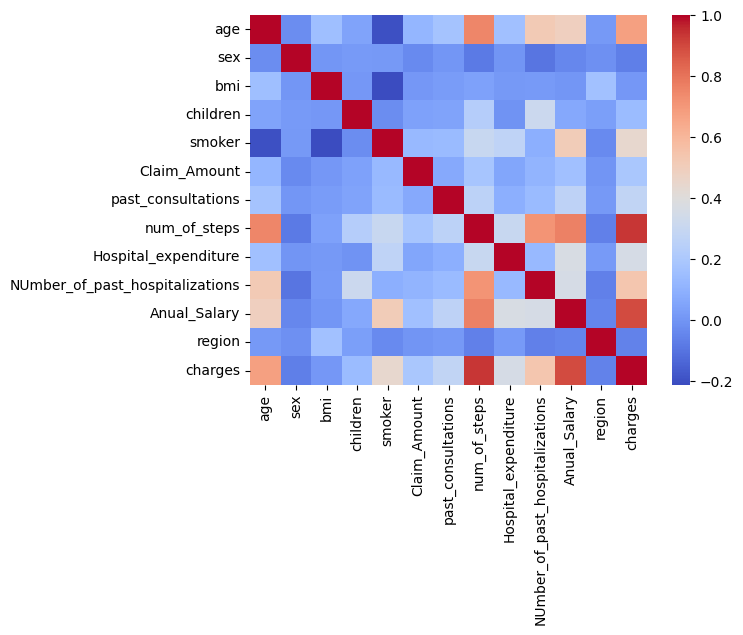

In [ ]:
# Checking the correlation between the columns

sns.heatmap(df.corr(), cmap='coolwarm')

In [ ]:
#Split independent and dependent variable

x = df.iloc[:,:-1]
y = df['charges']


In [ ]:
#Spliting the training and test dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, random_state=100)

In [ ]:
# Initialize the regression model

lr = LinearRegression()
lr.fit(x_train, y_train) #model learns the relationship b/w x and y
predicted = lr.predict(x_test)  # model predicts
r2 = r2_score(predicted, y_test) #r2 score to evaluate model.

In [164]:
print("Mean Absolute Error", mean_absolute_error(predicted, y_test))
print("Mean squared Error", mean_squared_error(predicted, y_test))
print("r2 score", r2)


Mean Absolute Error 768.2787249893356
Mean squared Error 866032.4710820401
r2 score 0.9528130853828899


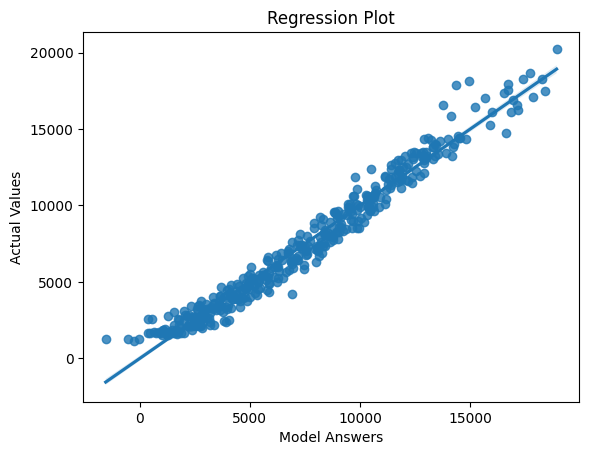

In [156]:
sns.regplot(x=predicted,y=y_test)
plt.title("Regression Plot")
plt.xlabel('Model Answers')
plt.ylabel('Actual Values')
plt.show()